In [1]:
# TUKE - Katedra kybernetiky a umelej inteligencie
# Maroš Stredanský
# Strojové učenie

# SVM - Support vector machine

In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [45]:
dataset = pd.read_csv("NFLX.csv")
dataset.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-26,344.000000,363.839996,341.730011,362.989990,362.989990,7229600
1,2020-03-27,359.089996,368.559998,353.000000,357.119995,357.119995,7948800
2,2020-03-30,363.000000,377.799988,361.170013,370.959991,370.959991,8622000
3,2020-03-31,367.929993,383.010010,366.440002,375.500000,375.500000,9366500
4,2020-04-01,376.049988,380.230011,361.019989,364.079987,364.079987,6672500
5,2020-04-02,364.079987,370.989990,360.059998,370.079987,370.079987,4592500
6,2020-04-03,367.470001,370.899994,357.510010,361.760010,361.760010,4860800


In [46]:
dates = []
prices = []
#riadky | stlpce
dataset.shape

(21, 7)

In [47]:
dataset.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-04-24,425.0,427.170013,415.880005,424.98999,424.98999,8658900


In [48]:
dataset = dataset.head(len(dataset)-1)
print(dataset.shape)

dataset_dates = data_set.loc[:,'Date'] 
#get all of the rows from the Date column


(20, 7)


In [49]:
dataset_open = dataset.loc[:,'Open']
#get all of the rows from the Open column

In [50]:
# Create the independent data set 'X' as dates
for date in dataset_dates:
    dates.append( [int(date.split('-')[2])])


In [51]:
#Create the dependent data set 'Y' as prices
for open_price in dataset_open:
    prices.append(float(open_price))

In [52]:
print(dates)

[[26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [9], [13], [14], [15], [16], [17], [20], [21], [22], [23]]


In [63]:
def prediction_model(dates, prices, x):
  
  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the models on the dates and prices
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  #return all three model predictions
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

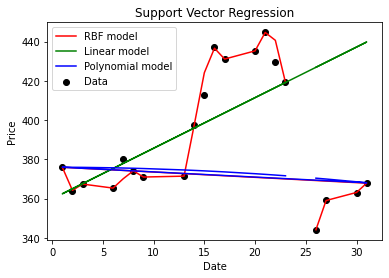

(358.9895717625176, 429.47801179996134, 369.9439257401091)


In [64]:
future_price = prediction_model(dates, prices, [[27]])
print(future_price)